In [2]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from pathlib import Path

In [3]:
ratings = pd.read_csv(Path('..','..','res','data','ratings.csv'))
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [40]:

# Zakładając, że masz DataFrame o nazwie df z kolumnami movie_id, user_id, rating

# Przygotowanie macierzy ocen
ratings_matrix = ratings.pivot_table(index='movie_id', columns='user_id', values='rating').fillna(0)

# Rozkład macierzy
svd = TruncatedSVD(n_components=50)  # Dobra liczba komponentów dobrane empirycznie
matrix_reduced = svd.fit_transform(ratings_matrix)

# Klasteryzacja
kmeans = KMeans(n_clusters=100)  # Dobra liczba klastrów dobrane empirycznie
kmeans.fit(matrix_reduced)

# Przypisanie klastrów do filmów
#ratings['cluster'] = kmeans.labels_


c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=100)

In [48]:
ratings_matrix.index.values

array([   1,    2,    3, ..., 1680, 1681, 1682], dtype=int64)

In [41]:
clust_dict = {'movie_id':ratings_matrix.index.values,
              'cluster': kmeans.labels_}
clust_df = pd.DataFrame(clust_dict, columns=clust_dict.keys())
clust_df.to_csv('items_cl.csv')

rtg_cl_merged = pd.merge(ratings, clust_df, on='movie_id', how='left')

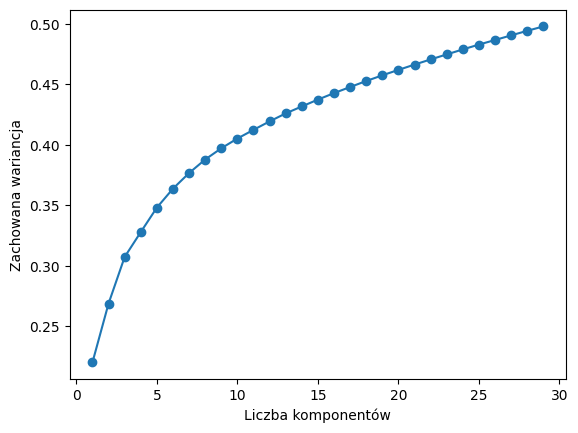

In [42]:
# liczba komponentów w SVD
import matplotlib.pyplot as plt
explained_variances = []
rr = range(1,30,1)
for n_components in rr:  # Przykładowy zakres
    svd = TruncatedSVD(n_components=n_components)
    svd.fit(ratings_matrix)
    explained_variances.append(svd.explained_variance_ratio_.sum())

plt.plot(rr, explained_variances, marker='o')
plt.xlabel('Liczba komponentów')
plt.ylabel('Zachowana wariancja')
plt.show()


c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wypyc\Desktop\inżynierka\project\Cold-Start-Problem-in-RS\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wypyc\Desktop\inżynier

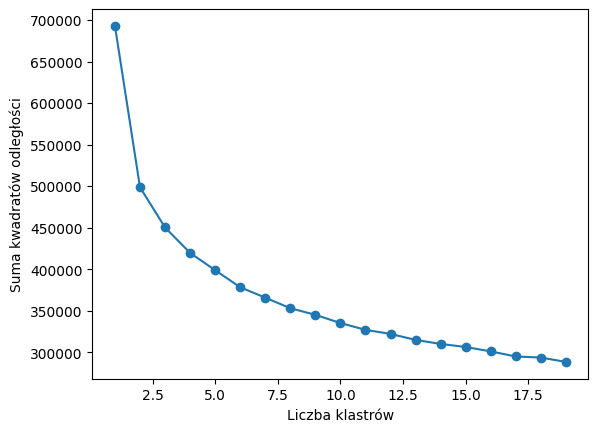

In [43]:
# liczba clustrów
distortions = []

for n_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(matrix_reduced)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości')
plt.show()

In [37]:
rtg_cl_merged.to_csv('all_items_clustered.csv')

In [8]:
ratings_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import skfuzzy as fuzz

# Wczytaj dane z pliku CSV
df = ratings #pd.read_csv('twoja_plik.csv')

# Przygotuj dane do analizy klastrów
data = df.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)

# Normalizuj dane (jeśli to konieczne)
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

# Transponuj dane, aby klastry były tworzone na podstawie filmów, a nie użytkowników
data_transposed = data_scaled.T

# Zdefiniuj parametry FCM
n_clusters = 100  # Dostosuj liczbę klastrów do swoich potrzeb
cntr, fuzzy_partition_matrix, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_transposed, n_clusters, 2, error=0.005, maxiter=1000
)

# Przypisz każdy film do klastra o największej przynależności
cluster_assignments = np.argmax(fuzzy_partition_matrix, axis=0)

"""# Dodaj kolumnę z przypisanymi klastrami do oryginalnego DataFrame
df['cluster'] = cluster_assignments[df['movie_id']].tolist()

# Wyświetl wyniki
print(df[['user_id', 'movie_id', 'cluster']])
"""

"# Dodaj kolumnę z przypisanymi klastrami do oryginalnego DataFrame\ndf['cluster'] = cluster_assignments[df['movie_id']].tolist()\n\n# Wyświetl wyniki\nprint(df[['user_id', 'movie_id', 'cluster']])\n"

In [35]:
np.unique(cluster_assignments)

array([10, 20, 23, 29, 36, 38, 56, 73, 91], dtype=int64)

In [32]:
itcl = pd.read_csv(Path('..','..','outputs','train_items_svd.csv'))
np.unique(itcl[itcl['cluster'] == 53].loc[:,'movie_id'].values)

array([ 50, 181], dtype=int64)

In [20]:
itcl[itcl['rating'] = 3]

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (2122233320.py, line 1)